In [1]:
#На выбор:
#	вариант A:
#		дихотомия и метод Ньютона:
#		реализовать в виде функций,
#		сделать ползунок для перебора значений вх. параметров (interaction_primer в папке материалов + ролик там же),
#		сделать вывод 6 кадров нахождения решения и оформить через массив графиков (6 графиков на одном холсте, расположенные в отдельных ячейках - есть в примере "Графики - операции с графиками")
#		сравнить ответ с тем, что даёт solve
#		Брать: y = x^3 - 9*x^2 + 23*x - 15
#		Примечание: 
#			1.обращать внимание на warning'и и прочие ошибки.
#			2.Наметки по методу Ньютона есть в "чисметы - Ньютон"


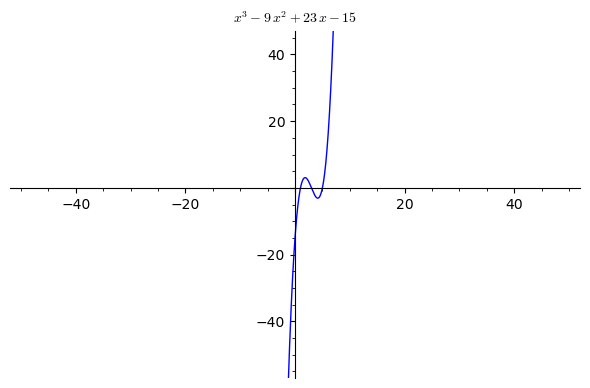

In [2]:
plot.options["xmin"] = -50
plot.options["xmax"] = 50
plot.options["ymin"] = -55
plot.options["ymax"] = 45

y(x) = x^3 - 9*x^2 + 23*x - 15
plot(y(x), title="${}$".format(latex(y(x))))

In [3]:
def newton(f, a, b, EPS):
    x1 = a
    x2 = (a + b) / 2
    
    df = f.derivative()

    while abs(x2 - x1) >= EPS:
        x1 = x2
        x2 = x1 - f(x=x1)/df(x=x1)

    return x1

In [4]:
EPS = 1e-5
@interact
def _(stepL=(0, 4, 2)):
        x_1 = newton(y(x), stepL, stepL+2, EPS)
        p3 = plot(y(x),(-5,10), title="${}$".format(y(x)))
        p3 += point((x_1, 0), color="red", size=30, zorder=20)
        p3 += text(r"$x_1$", (x_1, 5), color="black", fontsize=14)
        show(p3)

Interactive function <function _ at 0x6ffea37a3170> with 1 widget
  stepL: IntSlider(value=2, description='ste…

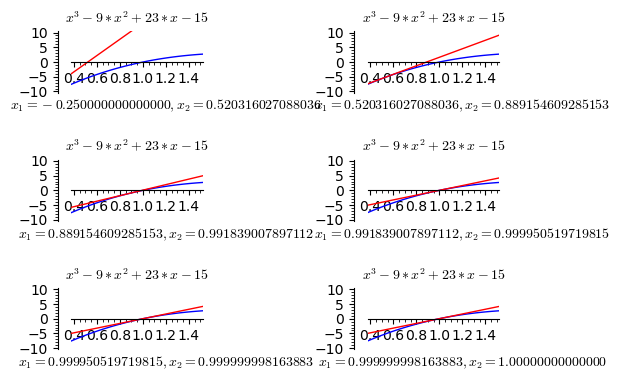

In [5]:
# visualization newton

x = var("x")

a = -3
b = 2.5
x1 = a
x2 = (a + b)/2
arrpl = []

p2 = plot(y(x),(-5,10), title="${}$".format(y(x)))

df = y(x).derivative()

while abs(x2 - x1) >= EPS:
    x1 = x2
    x2 = x1 - y(x1) / df(x=x1)
    l = df(x=x1)*(x - x1) + y(x1)
    #(p2 + plot(l, color="red") + text((r"$y={}$" + "\n" + r"$x_1={}, x_2={}$").format(x1, x2), (1.2, -15), fontsize=10, color="black")).show(xmin=0.4, xmax=1.5, ymin=-20, ymax=20)    
    
    arrpl.append(p2 + plot(l, color="red") + text((r"$x_1={}, x_2={}$").format(x1, x2), (1.2, -15), fontsize=10, color="black"))    
graphics_array([[arrpl[0],arrpl[1]],[arrpl[2],arrpl[3]],[arrpl[4],arrpl[5]]]).show(xmin=0.4, xmax=1.5, ymin=-10, ymax=10)

In [6]:
# дихотомия

In [7]:
import math
 
def dichotomy(f, a, b, EPS):
    while abs(b - a) > EPS:
        x1 = (a + b) / 2.0
        fx = f(x = x1)
        fa = f(x = a)
        if (fx < 0 and fa < 0) or (fx > 0 and fa > 0):
            a = x1
        else:
            b = x1
    return x1

In [8]:
@interact
def _(stepL=(1, 5, 2)):
    x_1 = dichotomy(y(x), stepL, stepL+2, EPS)
    p4 = plot(y(x),(-5,10), title="${}$".format(y(x)))
    p4 += point((x_1, 0), color="red", size=30, zorder=20)
    p4 += text(r"$x_1$", (x_1, 5), color="black", fontsize=14)
    show(p4)

Interactive function <function _ at 0x6ffea811c9e0> with 1 widget
  stepL: IntSlider(value=3, description='ste…

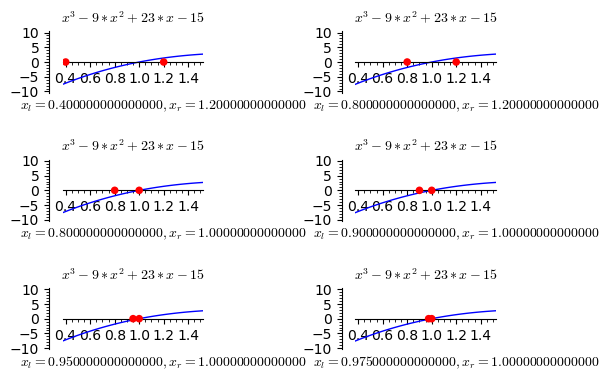

In [9]:
# visualization dichotomy

x = var("x")

a = 0.4
b = 2
arrpl = []

p2 = plot(y(x),(-5,10), title="${}$".format(y(x)))
for i in range(6):
    x3 = (a + b) / 2.0
    fx = y(x3)
    fa = y(a)
    if (fx < 0 and fa < 0) or (fx > 0 and fa > 0):
        a = x3
    else:
        b = x3
    #(p2 +  point((a, 0), color="red", size=30, zorder=20) + point((b, 0), color="red", size=30, zorder=20) + text((r"$x_l={}, x_r={}$").format(a, b), (1.2, -15), fontsize=10, color="black")).show(xmin=0.4, xmax=1.5, ymin=-20, ymax=20)    
    arrpl.append(p2 +  point((a, 0), color="red", size=30, zorder=20) + point((b, 0), color="red", size=30, zorder=20) + text((r"$x_l={}, x_r={}$").format(a, b), (1.2, -15), fontsize=10, color="black"))   
graphics_array([[arrpl[0],arrpl[1]],[arrpl[2],arrpl[3]],[arrpl[4],arrpl[5]]]).show(xmin=0.4, xmax=1.5, ymin=-10, ymax=10)

In [10]:
a = -1
b = 0
while b < 6:
    ++a
    b += 2
    x_1 = newton(y(x), a, b, EPS)
    show(x_1.n(digits = 5))

1.0000

1.0000

3.0000

In [11]:
a = -1
b = 0
while a < 5:
    a += 2
    b += 2
    x_1 = dichotomy(y(x), a, b, EPS)
    show(x_1.n(digits = 5))

1.0000

3.0000

5.0000

In [12]:
sols = solve(y(x),x)

for sol in sols:
    show(sol.rhs().n(digits = 5))

1.0000

5.0000

3.0000

In [13]:
#2.НОД
#	посмотреть примеры:
#		Полиномы - gcd и прочее
#	Задание:
#		реализовать расширенный алгоритм Евклида,
#		получить НОД, сравнить его с результатом от функции gcd()
#		получить представление НОД в виде: f*u + v*g (тождество Безу - см. примеры)
# 4 вариант
R.<x> = QQ["x"]

f = 5*x^5 - 21*x^4 + 23*x^3 - 37*x^2 + 77*x - 7
g = 10*x^4 - 42*x^3 + 56*x^2 - 26*x + 2

In [14]:
# Расширенный gcd

def mygcd(a, b):
    if (a == 0):
        return (b, 0, 1)
    qq = b // a
    rr = b % a
    d, xx, yy = (i for i in mygcd(rr, a))
    x = yy - qq * xx
    y = xx
    return (d, x, y)

Функция mygcd выводит:

In [15]:
show("f(x)*q+r*g(x)=gcd(f(x),g(x))")
d, q, r = (i for i in mygcd(f(x), g(x)))

show("q=",q)
show("r=",r)
show("GCD=",d)

'f(x)*q+r*g(x)=gcd(f(x),g(x))'

'q=' 2*x - 18

'r=' -x^2 + 9*x + 1

'GCD=' 640*x^2 - 1408*x + 128

Функция gcd выводит:

In [16]:
show(gcd(f(x), g(x)))

x^2 - 11/5*x + 1/5

In [17]:
show("f(x) * q + g(x) * r = gcd(f(x), g(x))")
show("(", f(x), ")", "*", "(", q, ")", "+", "(", r, ")", "*", g(x), '=', d )

'f(x) * q + g(x) * r = gcd(f(x), g(x))'

'(' 5*x^5 - 21*x^4 + 23*x^3 - 37*x^2 + 77*x - 7 ')' '*' '(' 2*x - 18 ')' '+' '(' -x^2 + 9*x + 1 ')' '*' 10*x^4 - 42*x^3 + 56*x^2 - 26*x + 2 '=' 640*x^2 - 1408*x + 128

In [18]:
show((f(x) * q + g(x) * r) == d)

True